<a href="https://colab.research.google.com/github/sanjaymkr/NYC-Taxi-Trip-Time-Prediction/blob/main/Sanjay_Kumar_NYC_Taxi_Trip_Time_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Taxi trip time Prediction : Predicting total ride duration of taxi trips in New York City</u></b>

## <b> Problem Description </b>

### Your task is to build a model that predicts the total ride duration of taxi trips in New York City. Your primary dataset is one released by the NYC Taxi and Limousine Commission, which includes pickup time, geo-coordinates, number of passengers, and several other variables.

## <b> Data Description </b>

### The dataset is based on the 2016 NYC Yellow Cab trip record data made available in Big Query on Google Cloud Platform. The data was originally published by the NYC Taxi and Limousine Commission (TLC). The data was sampled and cleaned for the purposes of this project. Based on individual trip attributes, you should predict the duration of each trip in the test set.

### <b>NYC Taxi Data.csv</b> - the training set (contains 1458644 trip records)


### Data fields
* #### id - a unique identifier for each trip
* #### vendor_id - a code indicating the provider associated with the trip record
* #### pickup_datetime - date and time when the meter was engaged
* #### dropoff_datetime - date and time when the meter was disengaged
* #### passenger_count - the number of passengers in the vehicle (driver entered value)
* #### pickup_longitude - the longitude where the meter was engaged
* #### pickup_latitude - the latitude where the meter was engaged
* #### dropoff_longitude - the longitude where the meter was disengaged
* #### dropoff_latitude - the latitude where the meter was disengaged
* #### store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip
* #### trip_duration - duration of the trip in seconds

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
file_path = ('/content/drive/MyDrive/Alma_Data/NYC Taxi Data.csv')
df = pd.read_csv(file_path)

In [5]:
df.shape

(1458644, 11)

Number of records: 1,458,644

Number of attributes: 11

In [6]:
df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [8]:
df.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [9]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [10]:
df.tail()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373
1458643,id1209952,1,2016-04-05 14:44:25,2016-04-05 14:47:43,1,-73.979538,40.781750,-73.972809,40.790585,N,198


In [11]:
df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


In [12]:
df.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

In [13]:
df["pickup_datetime"] = pd.to_datetime(df["pickup_datetime"])
df["dropoff_datetime"] = pd.to_datetime(df["dropoff_datetime"])

In [14]:
df.dtypes

id                            object
vendor_id                      int64
pickup_datetime       datetime64[ns]
dropoff_datetime      datetime64[ns]
passenger_count                int64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag            object
trip_duration                  int64
dtype: object

* Addition Feature 

In [15]:
df['pickup_weekday']=df['pickup_datetime'].dt.day_name()
df['dropoff_weekday']=df['dropoff_datetime'].dt.day_name()
df['pickup_weekday_num']=df['pickup_datetime'].dt.weekday
df['pickup_hour']=df['pickup_datetime'].dt.hour
df['month']=df['pickup_datetime'].dt.month

In [16]:
from geopy.distance import great_circle

In [17]:
def cal_distance(pickup_lat,pickup_long,dropoff_lat,dropoff_long):
 
 start_coordinates=(pickup_lat,pickup_long)
 stop_coordinates=(dropoff_lat,dropoff_long)
 
 return great_circle(start_coordinates,stop_coordinates).km

In [18]:
df['distance'] = df.apply(lambda x: cal_distance(x['pickup_latitude'],x['pickup_longitude'],x['dropoff_latitude'],x['dropoff_longitude'] ), axis=1)

In [19]:
df['speed'] = (df.distance/(df.trip_duration/3600))

In [20]:
df.dtypes

id                            object
vendor_id                      int64
pickup_datetime       datetime64[ns]
dropoff_datetime      datetime64[ns]
passenger_count                int64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag            object
trip_duration                  int64
pickup_weekday                object
dropoff_weekday               object
pickup_weekday_num             int64
pickup_hour                    int64
month                          int64
distance                     float64
speed                        float64
dtype: object

In [21]:
def time_of_day(x):
    if x in range(6,12):
        return 'Morning'
    elif x in range(12,16):
        return 'Afternoon'
    elif x in range(16,22):
        return 'Evening'
    else:
        return 'Late night'

In [70]:
df['pickup_timeofday']=df['pickup_hour'].apply(time_of_day)

In [23]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_weekday,dropoff_weekday,pickup_weekday_num,pickup_hour,month,distance,speed,pickup_timeofday
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Monday,Monday,0,17,3,1.498523,11.856445,Evening
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,Sunday,Sunday,6,0,6,1.805510,9.803673,Late night
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,Tuesday,Tuesday,1,11,1,6.385108,10.822216,Morning
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,Wednesday,Wednesday,2,19,4,1.485501,12.465739,Evening
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,Saturday,Saturday,5,13,3,1.188590,9.836608,Afternoon


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


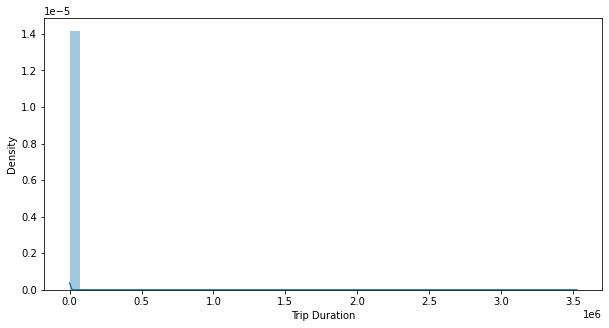

In [24]:
plt.figure(figsize = (10,5))
sns.distplot(df['trip_duration'])
plt.xlabel('Trip Duration')
 
plt.show()

This histogram shows right skewness, hence let's apply the log10 to transform it to the normal distribution.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


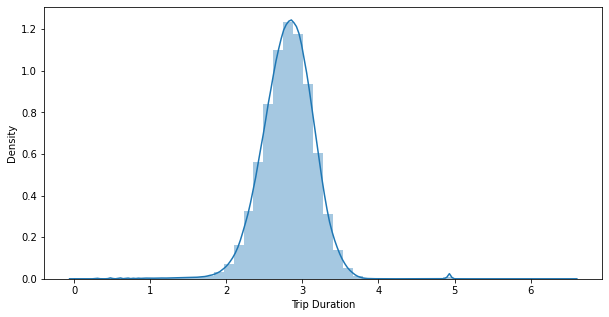

In [25]:
plt.figure(figsize = (10,5))
sns.distplot(np.log10(df['trip_duration']))
plt.xlabel('Trip Duration')
plt.show()

Here, we can see that trip_duration is normally distributed

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


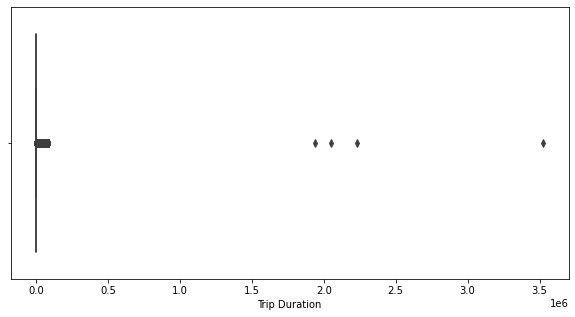

In [26]:
plt.figure(figsize = (10,5))
sns.boxplot(df.trip_duration)
plt.xlabel('Trip Duration')
plt.show()

We can clearly see an outlier and should be removed for the data consistency.

In [27]:
for i in range(0,100,10):
  duration= df['trip_duration'].values
  duration= np.sort(duration, axis= None)
  print("{} percentile value is {}".format(i, duration[int(len(duration)*(float(i)/100))]))
print("100 percentile value is ",duration[-1])

0 percentile value is 1
10 percentile value is 245
20 percentile value is 348
30 percentile value is 446
40 percentile value is 548
50 percentile value is 662
60 percentile value is 798
70 percentile value is 968
80 percentile value is 1208
90 percentile value is 1634
100 percentile value is  3526282


The 90th percentile i.e. 1634 looks reasonable. But, 100th percentile i.e. 3526282 is outlier. Hence removing these would be a better idea.

Let's expand from 90th percentile to 100th percentile as to look further for the 99th percentile.

In [28]:
for i in range(90,100):
  duration= df['trip_duration'].values
  duration= np.sort(duration, axis= None)
  print("{} percentile value is {}".format(i, duration[int(len(duration)*(float(i)/100))]))
print("100 percentile value is ",duration[-1])

90 percentile value is 1634
91 percentile value is 1703
92 percentile value is 1780
93 percentile value is 1869
94 percentile value is 1975
95 percentile value is 2104
96 percentile value is 2273
97 percentile value is 2497
98 percentile value is 2829
99 percentile value is 3440
100 percentile value is  3526282


Let's visualize the number of trips taken in slabs of 0-10, 20-30 ... minutes respectively

We can see that major chunk (99th percentile) of trip duration is completed in 3440 seconds i.e. nearly 1 hour.

There are very few trip which have duration greater than 5000 seconds.

Trip duration greater than 5000 seconds and also trip duration less than 30 seconds

In [29]:
df = df[df.trip_duration <= 5000]
df = df[df.trip_duration >= 30]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


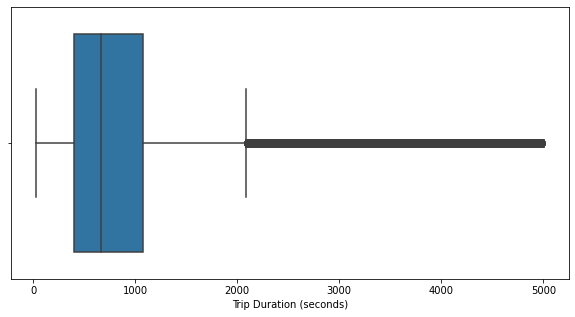

In [30]:
plt.figure(figsize = (10,5))
sns.boxplot(df.trip_duration)
plt.xlabel('Trip Duration (seconds)')
plt.show()

Major trip durations took between 10-20 mins to complete.

We can observe that most of the trips took 0 - 30 mins to complete i.e. approx 1800 secs

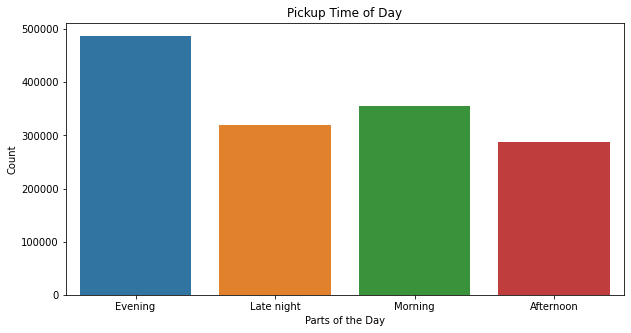

In [31]:
plt.figure(figsize = (10,5))
sns.countplot(x="pickup_timeofday",data=df)
plt.title('Pickup Time of Day')
plt.xlabel('Parts of the Day')
plt.ylabel('Count')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


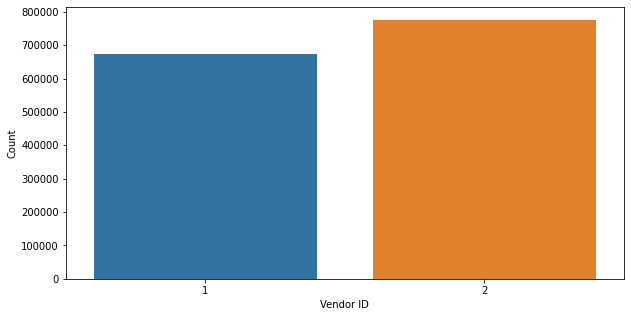

In [32]:
plt.figure(figsize = (10,5))
sns.countplot(df.vendor_id)
plt.xlabel('Vendor ID')
plt.ylabel('Count')
plt.show()

there is not much difference between the trips taken by both vendors

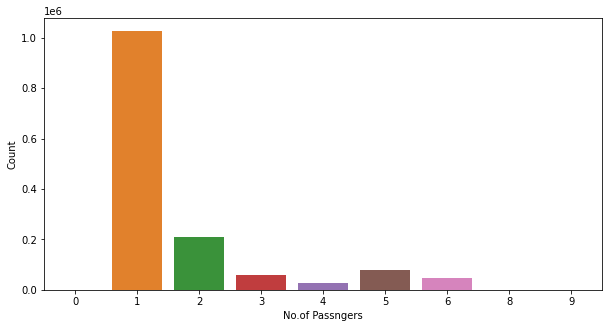

In [33]:
plt.figure(figsize = (10,5))
sns.countplot(x='passenger_count',data=df)
plt.ylabel('Count')
plt.xlabel('No.of Passngers')
plt.show()

remove the rows which have 0 or 8 or 9 passenger count.

In [34]:
df=df[df['passenger_count']!=0]
df=df[df['passenger_count']<=6]

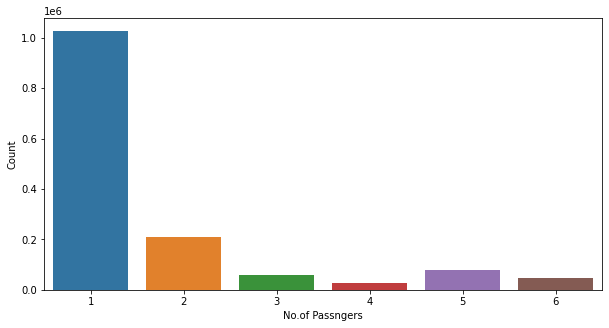

In [35]:
plt.figure(figsize = (10,5))
sns.countplot(x='passenger_count',data=df)
plt.ylabel('Count')
plt.xlabel('No.of Passngers')
plt.show()

We see the highest amount of trips was taken by a single passenger

In [36]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_weekday,dropoff_weekday,pickup_weekday_num,pickup_hour,month,distance,speed,pickup_timeofday
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Monday,Monday,0,17,3,1.498523,11.856445,Evening
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,Sunday,Sunday,6,0,6,1.805510,9.803673,Late night
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,Tuesday,Tuesday,1,11,1,6.385108,10.822216,Morning
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,Wednesday,Wednesday,2,19,4,1.485501,12.465739,Evening
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,Saturday,Saturday,5,13,3,1.188590,9.836608,Afternoon


In [37]:
df['store_and_fwd_flag'].value_counts(normalize=True)

N    0.994549
Y    0.005451
Name: store_and_fwd_flag, dtype: float64

We can see that only about 1% of the trip details were stored in the vehicle memory first before sending it to the server.



In [38]:
df['distance'].value_counts()

0.000000     4555
0.000424       20
0.000424       12
0.001273        6
0.000424        6
             ... 
0.937296        1
1.057748        1
19.743273       1
0.454561        1
1.134044        1
Name: distance, Length: 1445410, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


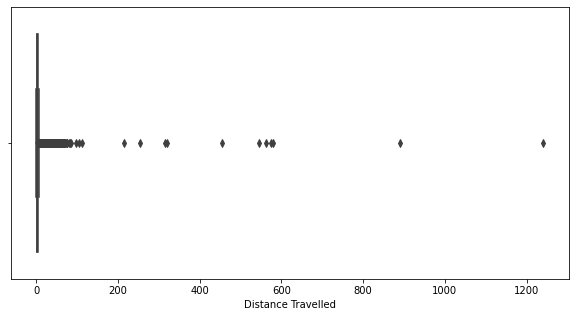

In [39]:
plt.figure(figsize = (10,5))
sns.boxplot(df.distance)

plt.xlabel('Distance Travelled')
plt.show()

There are some trips with over 100 km distance.

Some of the trips with 0 km distance

In [42]:
df = df[~(df.distance > 100)]
df = df[~(df.distance < 1)]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


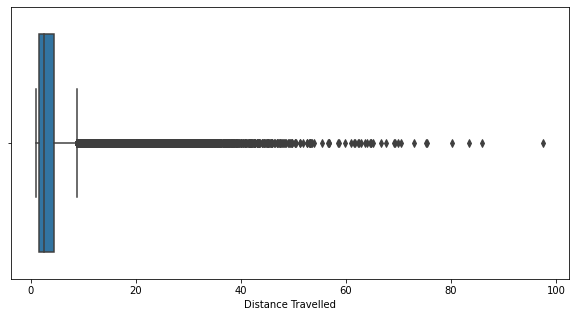

In [44]:
plt.figure(figsize = (10,5))
sns.boxplot(df.distance)
plt.xlabel('Distance Travelled')
plt.show()

In [45]:
df['speed'].value_counts()

9.580937     2
11.856445    1
24.973027    1
12.398293    1
10.174207    1
            ..
25.772829    1
9.354495     1
19.711113    1
13.742299    1
20.618974    1
Name: speed, Length: 1209265, dtype: int64

In [46]:
df['speed'].nlargest(10)

906281     1408.106827
693299      583.735137
1359910     564.208013
218935      520.505501
500725      424.861414
473439      356.616642
191997      318.580003
793555      270.595438
1328401     255.419847
176589      226.716083
Name: speed, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


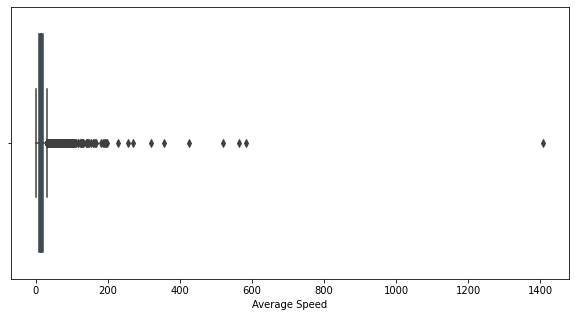

In [47]:
plt.figure(figsize = (10,5))
sns.boxplot(df.speed)
plt.xlabel('Average Speed')
plt.show()

There are trips that were done at a speed of over 100 km/h.



In [48]:
df = df[~(df.speed <1)]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


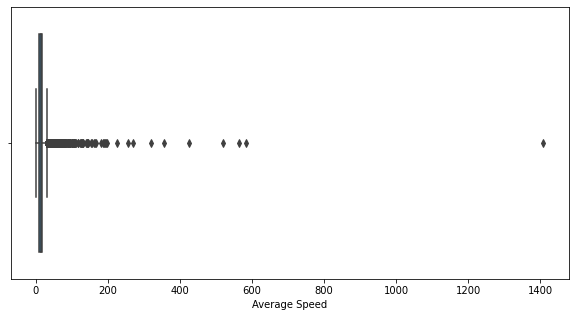

In [49]:
plt.figure(figsize = (10,5))
sns.boxplot(df.speed)
plt.xlabel('Average Speed')
plt.show()

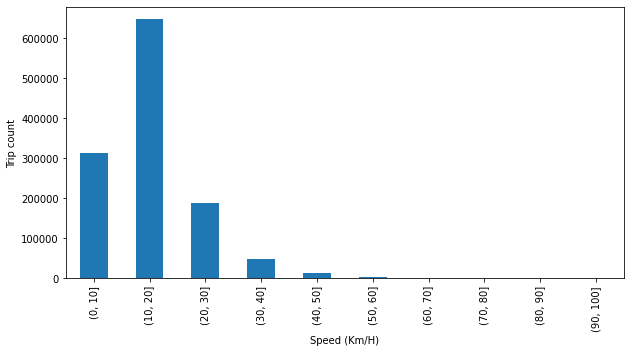

In [50]:
plt.figure(figsize = (10,5))
df.speed.groupby(pd.cut(df.speed, np.arange(0,104,10))).count().plot(kind = 'bar')
plt.ylabel('Trip count')
plt.xlabel('Speed (Km/H)')
plt.show()

Mostly trips are done at a speed range of 10-20 km/h.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


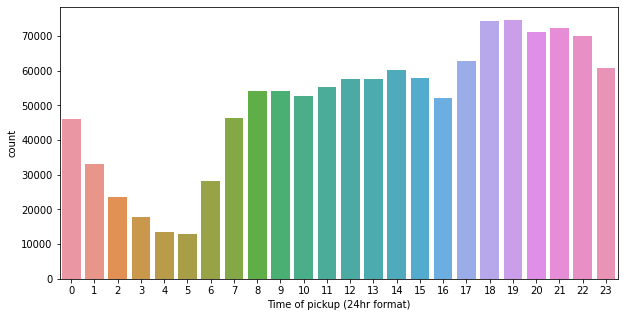

In [51]:
plt.figure(figsize = (10,5))
sns.countplot(df.pickup_hour)
plt.xlabel('Time of pickup (24hr format)')
plt.show()

Trips per hour

We see the busiest hours are 6:00 pm to 7:00 pm which makes sense as this is the time for people to return home from work

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


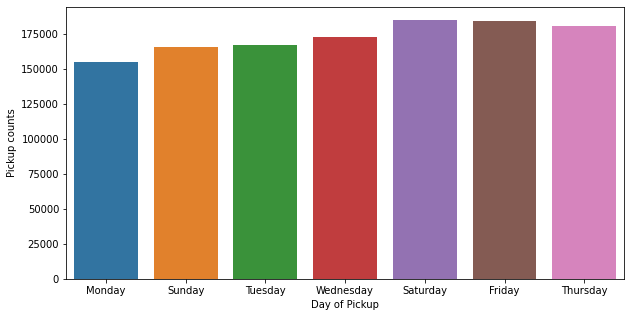

In [52]:
plt.figure(figsize = (10,5))
sns.countplot(df.pickup_weekday)
plt.xlabel('Day of Pickup')
plt.ylabel('Pickup counts')
plt.show()

We see Fridays are the busiest days followed by Saturdays

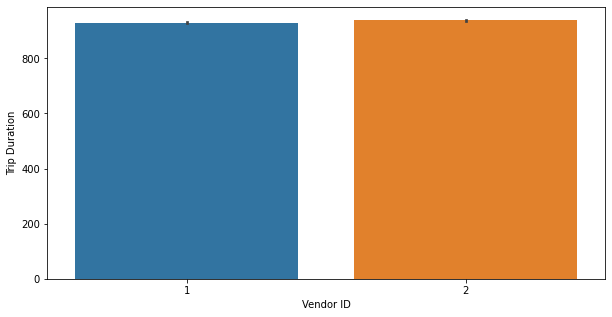

In [53]:
plt.figure(figsize = (10,5))
sns.barplot(y='trip_duration',x='vendor_id',data=df,estimator=np.mean)
plt.xlabel('Vendor ID')
plt.ylabel('Trip Duration')
plt.show()

Vendor id 2 takes longer trips as compared to vendor 1

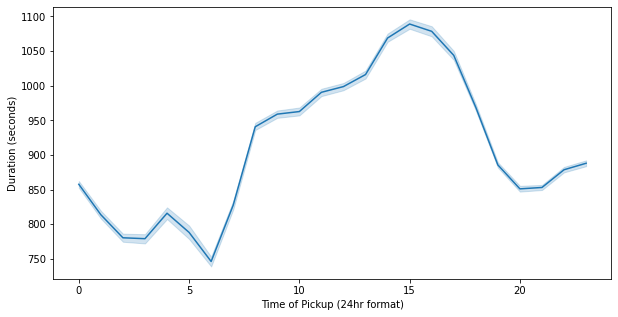

In [54]:
plt.figure(figsize = (10,5))
sns.lineplot(x='pickup_hour',y='trip_duration',data=df)
plt.xlabel('Time of Pickup (24hr format)')
plt.ylabel('Duration (seconds)')
plt.show()

We see the trip duration is the maximum around 3 pm

Trip duration is the lowest around 6 am as streets may not be busy.

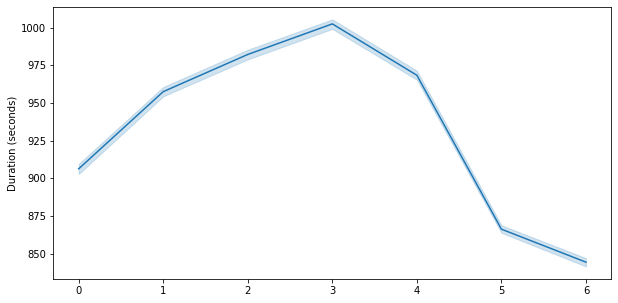

In [55]:
plt.figure(figsize = (10,5))
sns.lineplot(x='pickup_weekday_num',y='trip_duration',data=df)
plt.ylabel('Duration (seconds)')
plt.xlabel('')
plt.show()

Trip duration on thursday is longest among all days

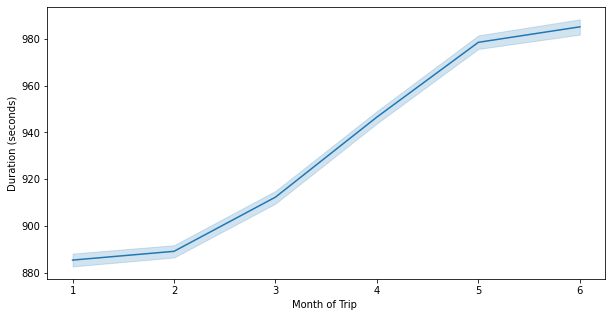

In [56]:
plt.figure(figsize = (10,5))
sns.lineplot(x='month',y='trip_duration', data=df)
plt.ylabel('Duration (seconds)')
plt.xlabel('Month of Trip ')

plt.show()

From February, we can see trip duration rising every month

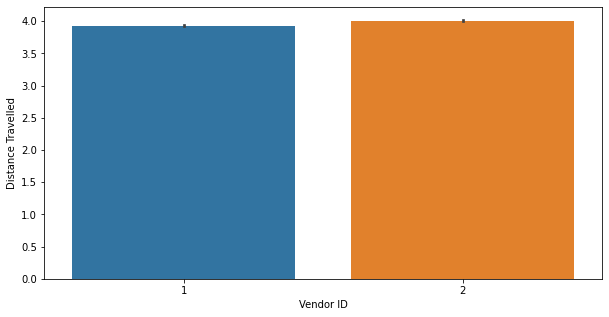

In [57]:
plt.figure(figsize = (10,5))
sns.barplot(y='distance',x='vendor_id',data=df,estimator=np.mean)
plt.ylabel('Distance Travelled')
plt.xlabel('Vendor ID')
plt.show()

The distribution for both vendors is very similar.

<Figure size 720x360 with 0 Axes>

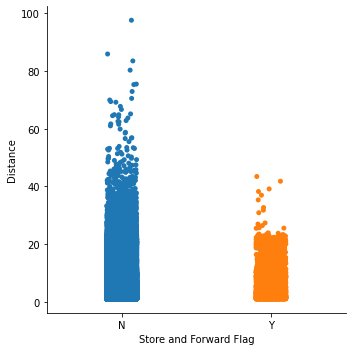

In [58]:
plt.figure(figsize = (10,5))
sns.catplot(y='distance',x='store_and_fwd_flag',data=df,kind='strip')
plt.ylabel('Distance')
plt.xlabel('Store and Forward Flag')
plt.show()

We see for longer distances the trip is not stored

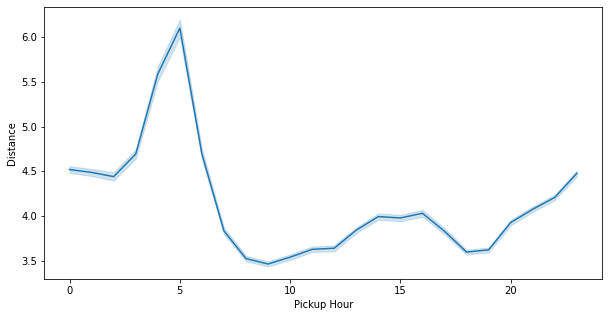

In [59]:
plt.figure(figsize = (10,5))
sns.lineplot(y='distance',x='pickup_hour',data=df)
plt.ylabel('Distance')
plt.xlabel('Pickup Hour')
plt.show()

* Trip distance is highest during early morning hours.
* It is fairly equal from morning till the evening varying around 3 - 3.5 kms.
* It starts increasing gradually towards the late night hours starting from evening till 5 AM and decrease steeply towards morning

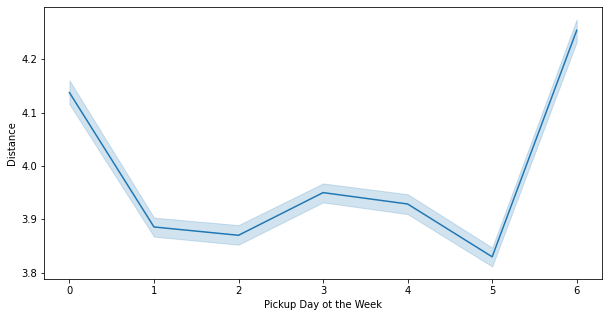

In [60]:
plt.figure(figsize = (10,5))
sns.lineplot(x='pickup_weekday_num', y='distance',data=df)
plt.ylabel('Distance')
plt.xlabel('Pickup Day ot the Week')
plt.show()

So it's a fairly equal distribution with average distance metric verying around 3.5 km/h with Sunday

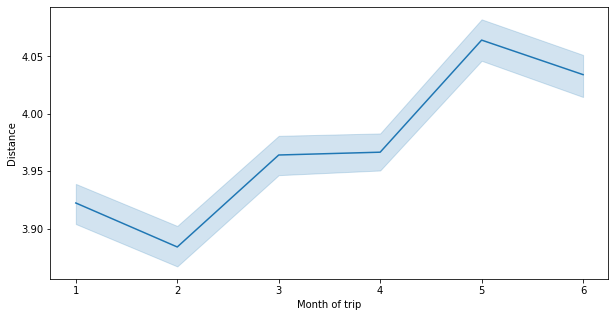

In [61]:
plt.figure(figsize = (10,5))
sns.lineplot(x='month', y='distance',data=df)
plt.ylabel('Distance')
plt.xlabel('Month of trip')
plt.show()

As we already saw during trip duration per month, similarly trip distance is lowest in 2nd month and maximum in 5th month.

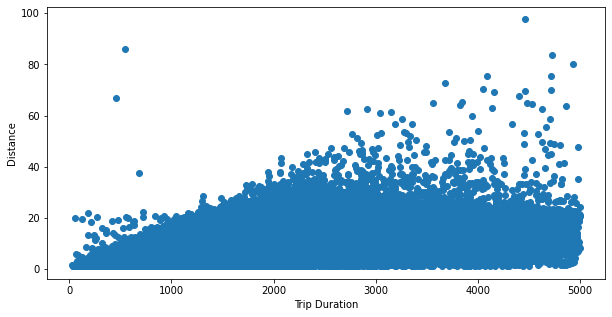

In [62]:
plt.figure(figsize = (10,5))
plt.scatter(x='trip_duration', y='distance',data=df)
plt.ylabel('Distance')
plt.xlabel('Trip Duration')
plt.show()

Initially there is some proper correlation between the distance covered and the trip duration in the graph, but later on it seems a little uncorrelated.

We should remove those trips which covered 0 km distance.

In [63]:
df = df[~(df.distance == 0)]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


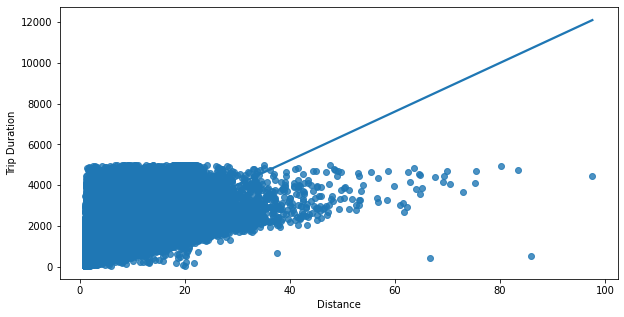

In [64]:
plt.figure(figsize = (10,5))
sns.regplot(df.distance, df.trip_duration)
plt.ylabel('Trip Duration')
plt.xlabel('Distance')
plt.show()

The straight line shows some linear relation between the two

**One Hot Encoding**

Dummify features like 'store_and_fwd_flag', and 'pickup_weekday'.

In [65]:
dummy = pd.get_dummies(df.store_and_fwd_flag, prefix='store_and_fwd_flag')
df = pd.concat([df,dummy], axis = 1)

In [67]:
dummy = pd.get_dummies(df.pickup_weekday, prefix='pickup_weekday', drop_first=True)
df = pd.concat([df,dummy], axis = 1,)

In [99]:
df['trip_duration_hour']=df['trip_duration']/3600

KeyError: ignored

In [78]:
df=df.drop(['id','pickup_datetime', 'dropoff_datetime', 'store_and_fwd_flag', 'pickup_weekday', 'dropoff_weekday', 'pickup_weekday_num', 'pickup_timeofday', 'trip_duration', 'speed'], axis=1)

KeyError: ignored

In [79]:
df.head()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,pickup_hour,month,distance,store_and_fwd_flag_N,store_and_fwd_flag_Y,pickup_weekday_Monday,pickup_weekday_Saturday,pickup_weekday_Sunday,pickup_weekday_Thursday,pickup_weekday_Tuesday,pickup_weekday_Wednesday,pickup_timeofday
0,2,1,-73.982155,40.767937,-73.964630,40.765602,17,3,1.498523,1,0,1,0,0,0,0,0,Evening
1,1,1,-73.980415,40.738564,-73.999481,40.731152,0,6,1.805510,1,0,0,0,1,0,0,0,Late night
2,2,1,-73.979027,40.763939,-74.005333,40.710087,11,1,6.385108,1,0,0,0,0,0,1,0,Morning
3,2,1,-74.010040,40.719971,-74.012268,40.706718,19,4,1.485501,1,0,0,0,0,0,0,1,Evening
4,2,1,-73.973053,40.793209,-73.972923,40.782520,13,3,1.188590,1,0,0,1,0,0,0,0,Afternoon


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1209256 entries, 0 to 1458643
Data columns (total 18 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   vendor_id                 1209256 non-null  int64  
 1   passenger_count           1209256 non-null  int64  
 2   pickup_longitude          1209256 non-null  float64
 3   pickup_latitude           1209256 non-null  float64
 4   dropoff_longitude         1209256 non-null  float64
 5   dropoff_latitude          1209256 non-null  float64
 6   pickup_hour               1209256 non-null  int64  
 7   month                     1209256 non-null  int64  
 8   distance                  1209256 non-null  float64
 9   store_and_fwd_flag_N      1209256 non-null  uint8  
 10  store_and_fwd_flag_Y      1209256 non-null  uint8  
 11  pickup_weekday_Monday     1209256 non-null  uint8  
 12  pickup_weekday_Saturday   1209256 non-null  uint8  
 13  pickup_weekday_Sunday     1

In [82]:
df.shape

(1209256, 18)

In [83]:
df.isnull().sum()

vendor_id                   0
passenger_count             0
pickup_longitude            0
pickup_latitude             0
dropoff_longitude           0
dropoff_latitude            0
pickup_hour                 0
month                       0
distance                    0
store_and_fwd_flag_N        0
store_and_fwd_flag_Y        0
pickup_weekday_Monday       0
pickup_weekday_Saturday     0
pickup_weekday_Sunday       0
pickup_weekday_Thursday     0
pickup_weekday_Tuesday      0
pickup_weekday_Wednesday    0
pickup_timeofday            0
dtype: int64

We don't have any missing values in our dataset

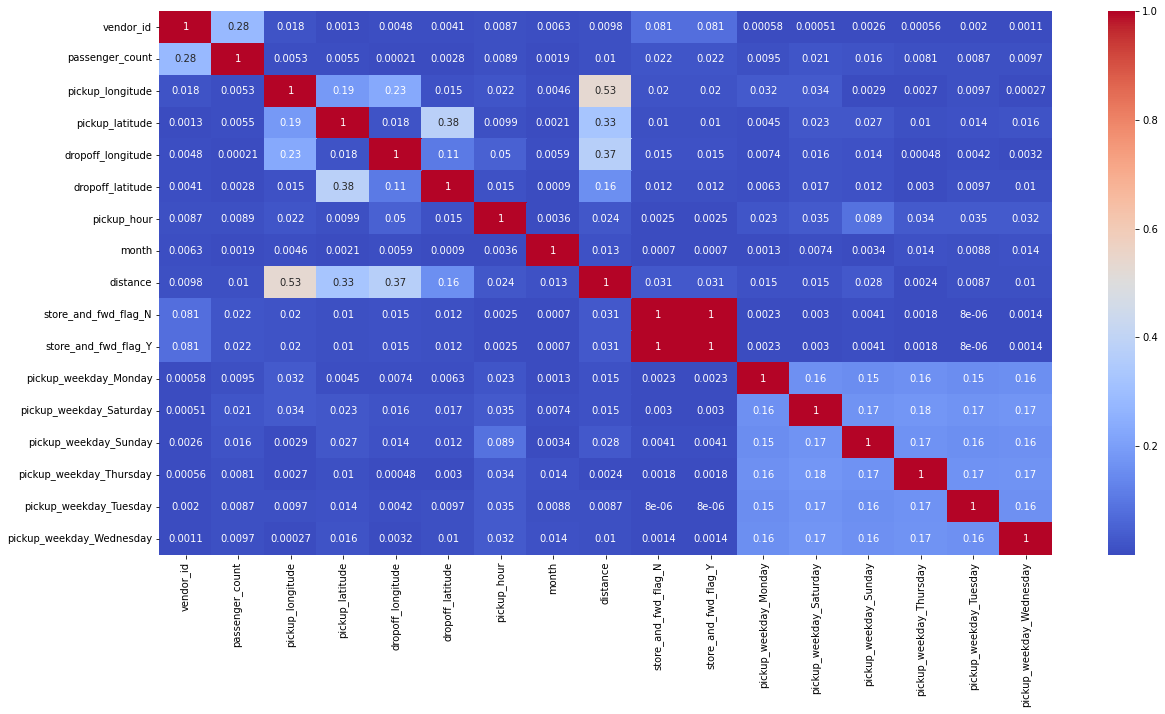

In [84]:
plt.figure (figsize= (20,10))
corelation= df.corr()
sns.heatmap(abs(corelation), annot=True, cmap='coolwarm')

* We can see store_and_fwd_flag_y and store_and_fwd_flag_N are highly correlated.
* Also they do not affect the target varible i.e. trip_duration_hour much

In [85]:
df=df.drop(['store_and_fwd_flag_N', 'store_and_fwd_flag_Y','vendor_id'], axis=1)

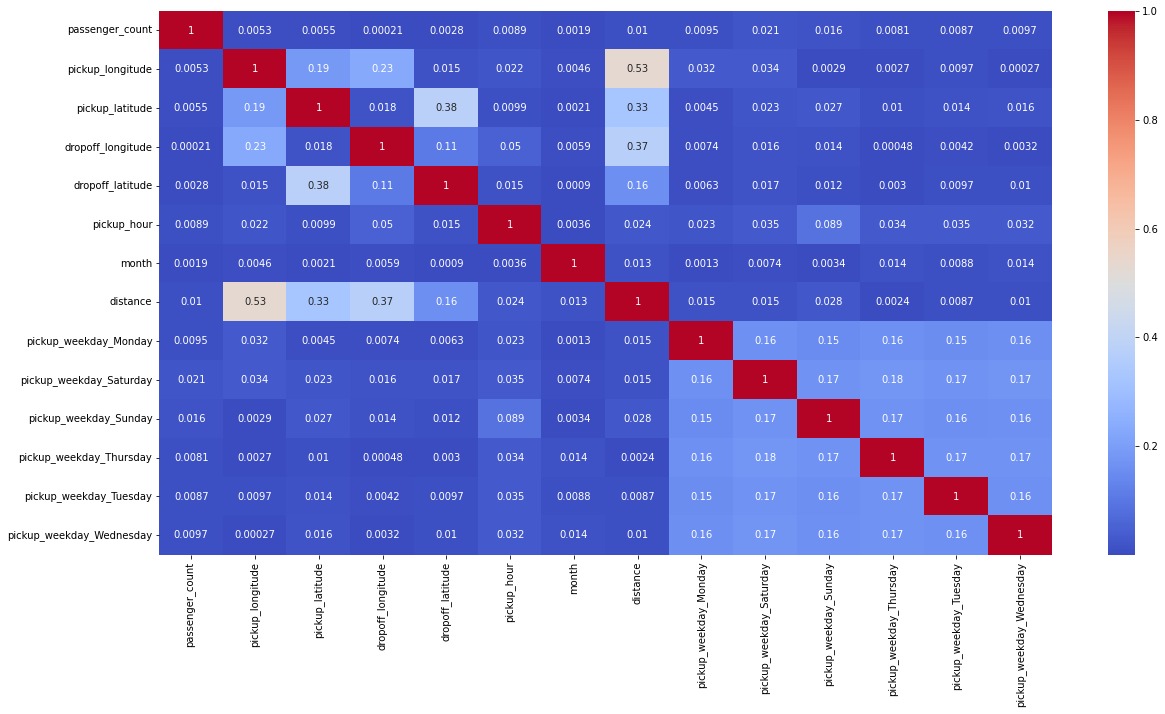

In [86]:
plt.figure (figsize= (20,10))
corelation= df.corr()
sns.heatmap(abs(corelation), annot=True, cmap='coolwarm')

Now check numerical features.

In [87]:
numeric_features= df.describe().columns

In [88]:
features= numeric_features.copy()
features= list(features)
features= features[:-1]
features

['passenger_count',
 'pickup_longitude',
 'pickup_latitude',
 'dropoff_longitude',
 'dropoff_latitude',
 'pickup_hour',
 'month',
 'distance',
 'pickup_weekday_Monday',
 'pickup_weekday_Saturday',
 'pickup_weekday_Sunday',
 'pickup_weekday_Thursday',
 'pickup_weekday_Tuesday']

In [89]:
len(features)

13

In [90]:
from scipy.stats import zscore

In [101]:
X = df[features].apply(zscore)[:] 
y= np.log10(df['trip_duration_hour'])[:]

KeyError: ignored

**Splitting the data in train and test sets**

In [92]:
#Importing RFE and Linear Regression 
from sklearn.model_selection import train_test_split

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

NameError: ignored

Splited the selected data set in 75-25 split for training and testing purpose respectively

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

#printing the boolean result


In [ ]:
lm =  LinearRegression()
rfe = RFE(lm, n_features_to_select=12)
rfe= rfe.fit(X_train, y_train)
rfe.support_

In [ ]:
#Assign the rfe features from X_train into col 
col= X_train.columns[rfe.support_]

**Building Model using sklearn**

In [ ]:
#X_train_rfe is nothing but assigning remaining features after eliminating unimportant features from X_train
X_train_rfe= X_train[col]

In [ ]:
import statsmodels.api as sm
#Adding a constant variable
X_train_rfe= sm.add_constant(X_train_rfe)

**Running the Linear Model.**

In [ ]:
lm= sm.OLS(y_train, X_train_rfe).fit()

Let's see the summary of our linear model.

In [ ]:
print(lm.summary())

In [ ]:
X_test.shape

**Making Prediction**

Let's use our model to make prediction.

In [ ]:
#Making prediction
y_pred_train= lm.predict(X_train_rfe)

In [ ]:
X_test_rfe= X_test[col]
#Adding a condtant variable
X_test_rfe= sm.add_constant(X_test_rfe)

#Making prediction
y_pred_test= lm.predict(X_test_rfe)

**Model Evaluation**

Now, let's check how well our model is able to make prediction.

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [ ]:
lr_train_mse  = mean_squared_error((y_train), (y_pred_train))
print("Train MSE :" , lr_train_mse)

lr_train_rmse = np.sqrt(lr_train_mse)

print("Train RMSE :" ,lr_train_rmse)

lr_train_r2 = r2_score((y_train), (y_pred_train))
print("Train R2 :" ,lr_train_r2) 

lr_train_r2_ = 1-(1-r2_score((y_train), (y_pred_train)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))
print("Train Adjusted R2 : ",lr_train_r2_)

In [ ]:
lr_test_mse  = mean_squared_error((y_test), (y_pred_test))
print("Test MSE :" , lr_test_mse)

lr_test_rmse = np.sqrt(lr_test_mse)

print("Test RMSE :" ,lr_test_rmse)

lr_test_r2 = r2_score((y_test), (y_pred_test))
print("Test R2 :" ,lr_test_r2)

lr_test_r2_ = 1-(1-r2_score((y_test), (y_pred_test)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print("Test Adjusted R2 : ",lr_test_r2_)

In [ ]:
#Actual vs Prediction
plt.figure(figsize= (10,5))
c= [i for i in range(0, len(y_test))]
plt.plot(c, y_test, color='blue', linewidth=2.5, linestyle='-')
plt.plot(c, y_pred_test, color='red', linewidth=2.5, linestyle='-')
plt.title('Actual vs Predicted for Test Data', fontsize=20)
plt.legend(["Actual", "Predicted"])
plt.show()

In [ ]:
plt.figure(figsize= (10,5))
c= [i for i in range(0, len(y_test))]
plt.plot(c, y_test-y_pred_test, color='blue', linewidth=2.5, linestyle='-')
plt.title('Error Term', fontsize=20)
plt.show()

As we can clearly see the Linear regression model does not provide us with high accuracy. It has high prediction error on the metrics we tested.

**Running Lasso Regression**

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
#Cross validation
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='r2', cv=5)
lasso_regressor.fit(X_train, y_train)

In [ ]:
print('The best fit alpha value is found out to be :', lasso_regressor.best_params_)
print('The R2 score using the same alpha is :', lasso_regressor.best_score_)

In [ ]:
lasso_regressor.score(X_train, y_train)

In [ ]:
y_pred_lasso_train = lasso_regressor.predict(X_train)
y_pred_lasso_test = lasso_regressor.predict(X_test)

**Model Evaluation**

In [ ]:
lasso_train_mse  = mean_squared_error(y_train, y_pred_lasso_train)
print("Train MSE :" , lasso_train_mse)

lasso_train_rmse = np.sqrt(lasso_train_mse)
print("Train RMSE :" ,lasso_train_rmse)

lasso_train_r2 = r2_score(y_train, y_pred_lasso_train)
print("Train R2 :" ,lasso_train_r2)

lasso_train_r2_= 1-(1-r2_score(y_train, y_pred_lasso_train))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))
print("Train Adjusted R2 : ", lasso_train_r2)

In [ ]:
lasso_test_mse  = mean_squared_error(y_test, y_pred_lasso_test)
print("Test MSE :" , lasso_test_mse)

lasso_test_rmse = np.sqrt(lasso_test_mse)
print("Test RMSE :" ,lasso_test_rmse)

lasso_test_r2 = r2_score(y_test, y_pred_lasso_test)
print("Test R2 :" ,lasso_test_r2)

lasso_test_r2_= 1-(1-r2_score(y_test, y_pred_lasso_test))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print("Test Adjusted R2 : ", lasso_test_r2_)

In [ ]:
#Actual vs Prediction
plt.figure(figsize= (10,5))
c= [i for i in range(0, len(y_test))]
plt.plot(c, y_test, color='blue', linewidth=2.5, linestyle='-')
plt.plot(c, y_pred_lasso_test, color='red', linewidth=2.5, linestyle='-')
plt.title('Actual vs Predicted for Test Data', fontsize=20)
plt.legend(["Actual", "Predicted"])
plt.show()

In [ ]:
plt.figure(figsize= (10,5))
c= [i for i in range(0, len(y_test))]
plt.plot(c, y_test-y_pred_lasso_test, color='blue', linewidth=2.5, linestyle='-')
plt.title('Error Term', fontsize=20)
plt.show()

**Running Ridge Regression**

In [ ]:
from sklearn.linear_model import Ridge
#Cross validation
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='r2', cv=5)
ridge_regressor.fit(X_train, y_train)

In [ ]:
print('The best fit alpha value is found out to be :' ,ridge_regressor.best_params_)
print('The R2 score using the same alpha is :', lasso_regressor.best_score_)

In [ ]:
ridge_regressor.best_estimator_

In [ ]:
ridge_regressor.score(X_train, y_train)

In [ ]:
y_pred_ridge_train=ridge_regressor.predict(X_train)
y_pred_ridge_test = ridge_regressor.predict(X_test)

**Model Evaluation**

In [ ]:
ridge_train_mse  = mean_squared_error(y_train, y_pred_ridge_train)
print("Train MSE :" , ridge_train_mse)

ridge_train_rmse = np.sqrt(ridge_train_mse)
print("Train RMSE :" ,ridge_train_rmse)

ridge_train_r2 = r2_score(y_train, y_pred_ridge_train)
print("Train R2 :" ,ridge_train_r2)

ridge_train_r2_= 1-(1-r2_score(y_train, y_pred_ridge_train))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))
print("Train Adjusted R2 : ", ridge_train_r2)

In [ ]:
ridge_test_mse  = mean_squared_error(y_test, y_pred_ridge_test)
print("Test MSE :" , ridge_test_mse)

ridge_test_rmse = np.sqrt(ridge_test_mse)
print("Test RMSE :" ,ridge_test_rmse)

ridge_test_r2 = r2_score(y_test, y_pred_ridge_test)
print("Test R2 :" ,ridge_test_r2)

ridge_test_r2_= 1-(1-r2_score(y_test, y_pred_ridge_test))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print("Test Adjusted R2 : ", ridge_test_r2_)

In [ ]:
#Actual vs Prediction
plt.figure(figsize= (10,5))
c= [i for i in range(0, len(y_test))]
plt.plot(c, y_test, color='blue', linewidth=2.5, linestyle='-')
plt.plot(c, y_pred_ridge_test, color='red', linewidth=2.5, linestyle='-')
plt.title('Actual vs Predicted for Test Data', fontsize=20)
plt.legend(["Actual", "Predicted"])
plt.show()

In [ ]:
plt.figure(figsize= (10,5))
c= [i for i in range(0, len(y_test))]
plt.plot(c, y_test-y_pred_ridge_test, color='blue', linewidth=2.5, linestyle='-')
plt.title('Error Term', fontsize=20)
plt.show()

The Ridge regresion model doesn't improve on the Linear model either.

**Running Decision Tree Regressor**

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
# Maximum depth of trees
max_depth = [4,6,8,10]
 
# Minimum number of samples required to split a node
min_samples_split = [10,20,30]
 
# Minimum number of samples required at each leaf node
min_samples_leaf = [8,16,22]
 
# Hyperparameter Grid
param_dict_dt = {
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}
#the cache variables contains the best parameters for the Decision Tree that we already tested before to save time when running again
cache = {
              'max_depth' : [10],
              'min_samples_split' : [10],
              'min_samples_leaf' : [22]}

In [ ]:
param_dict_dt

In [ ]:
dt = DecisionTreeRegressor()

# Grid search
dt_grid = GridSearchCV(estimator=dt,
                       param_grid = cache,
                       cv = 5, verbose=2, scoring='r2')

dt_grid.fit(X_train,y_train)

In [ ]:
dt_grid.best_estimator_

In [ ]:
y_pred_dt_train=dt_grid.predict(X_train)
y_pred_dt_test=dt_grid.predict(X_test)

**Model Evaluation**


In [ ]:
dt_train_mse  = mean_squared_error(y_train, y_pred_dt_train)
print("Train MSE :" , dt_train_mse)

dt_train_rmse = np.sqrt(dt_train_mse)
print("Train RMSE :" ,dt_train_rmse)

dt_train_r2 = r2_score(y_train, y_pred_dt_train)
print("Train R2 :" ,dt_train_r2)

dt_train_r2_= 1-(1-r2_score(y_train, y_pred_dt_train))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))
print("Train Adjusted R2 : ", dt_train_r2_)

In [ ]:
dt_test_mse  = mean_squared_error(y_test, y_pred_dt_test)
print("Test MSE :" , dt_test_mse)
dt_test_rmse = np.sqrt(dt_test_mse)
print("Test RMSE :" ,dt_test_rmse)

dt_test_r2 = r2_score(y_test, y_pred_dt_test)
print("Test R2 :" ,dt_test_r2)

dt_test_r2_= 1-(1-r2_score(y_test, y_pred_dt_test))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print("Test Adjusted R2 : ", dt_test_r2_)

In [ ]:
#Actual vs Prediction
plt.figure(figsize= (10,5))
c= [i for i in range(0, len(y_test))]
plt.plot(c, y_test, color='blue', linewidth=2.5, linestyle='-')
plt.plot(c, y_pred_dt_test, color='red', linewidth=2.5, linestyle='-')
plt.title('Actual vs Predicted for Test Data', fontsize=20)
plt.legend(["Actual", "Predicted"])
plt.show()

In [ ]:
plt.figure(figsize= (10,5))
c= [i for i in range(0, len(y_test))]
plt.plot(c, y_test-y_pred_dt_test, color='blue', linewidth=2.5, linestyle='-')
plt.title('Error Term', fontsize=20)
plt.show()

In [ ]:
plt.figure(figsize=(10,5))
sns.distplot(y_test - y_pred_dt_test )
plt.title('Error Term', fontsize=20)
plt.show()

The decision tree with the selected hyperparameters does improve the predictions of the model considerably. It still isn't ideal but it is certainly much better than Linear models.

**Running XGBoost Regressor**

In [ ]:
n_estimators = [80,150,200]
 
# Maximum depth of trees
max_depth = [5,8,10]
min_samples_split = [40,50]
learning_rate=[0.2,0.4,0.6]
 
# Hyperparameter Grid
param_xgb = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
             'min_samples_' : min_samples_split,
             'learning_rate' : learning_rate
             }
#the cache variables contains the best parameters for the XGBoost which we already tested before to save time when running it again.
cache = {'n_estimators' : [200],
              'max_depth' : [8],
             'min_samples_' : [40],
             'learning_rate' : [0.2],
             }

In [ ]:
param_xgb

In [ ]:
import xgboost as xgb
xgb_model = xgb.XGBRegressor(tree_method = 'gpu_hist')

# Grid search
xgb_grid = GridSearchCV(estimator=xgb_model,
                        param_grid = cache,
                        cv = 3, verbose=1,
                        scoring="r2")

xgb_grid.fit(X_train,y_train)

In [ ]:
xgb_grid.best_score_

In [ ]:
xgb_grid.best_params_

In [ ]:
y_pred_xgb_train=xgb_grid.predict(X_train)
y_pred_xgb_test=xgb_grid.predict(X_test)

**Model Evaluation**

In [ ]:
xgb_train_mse  = mean_squared_error(y_train, y_pred_xgb_train)
print("Train MSE :" , xgb_train_mse)

xgb_train_rmse = np.sqrt(xgb_train_mse)
print("Train RMSE :" ,xgb_train_rmse)

xgb_train_r2 = r2_score(y_train, y_pred_xgb_train)
print("Train R2 :" ,xgb_train_r2)

xgb_train_r2_= 1-(1-r2_score((y_train), (y_pred_xgb_train)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))
print("Train Adjusted R2 : ", xgb_train_r2_)

In [ ]:
xgb_test_mse  = mean_squared_error(y_test, y_pred_xgb_test)
print("Test MSE :" , xgb_test_mse)

xgb_test_rmse = np.sqrt(xgb_test_mse)
print("Test RMSE :" ,xgb_test_rmse)

xgb_test_r2 = r2_score(y_test, y_pred_xgb_test)
print("Test R2 :" ,xgb_test_r2)

xgb_test_r2_= 1-(1-r2_score((y_test), (y_pred_xgb_test)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print("Test Adjusted R2 : ", xgb_test_r2_)

In [ ]:
#Actual vs Prediction
plt.figure(figsize= (10,5))
c= [i for i in range(0, len(y_test))]
plt.plot(c, y_test, color='blue', linewidth=2.5, linestyle='-')
plt.plot(c, y_pred_xgb_test, color='red', linewidth=2.5, linestyle='-')
plt.title('Actual vs Predicted for Test Data', fontsize=20)
plt.legend(["Actual", "Predicted"])
plt.show()

In [ ]:
plt.figure(figsize= (10,5))
c= [i for i in range(0, len(y_test))]
plt.plot(c, y_test-y_pred_xgb_test, color='blue', linewidth=2.5, linestyle='-')
plt.title('Error Term', fontsize=20)
plt.show()

Finally, let's also look the feature importance

In [ ]:
importance_df= pd.DataFrame({'Features': features, 'Feature_importance': list(xgb_grid.best_estimator_.feature_importances_)})
importance_df

In [ ]:
importance_df.sort_values(by=['Feature_importance'],ascending=False,inplace=True)

Let's look it by using bar grabh.

In [ ]:
plt.figure(figsize=(15,6))
plt.title('Feature Importance', fontsize=20)
sns.barplot(x='Features',y="Feature_importance", data=importance_df[:6])
plt.show()

Clearly, we can see distance is the top contributor to trip duration followed by different days of the weeks.

Plotting the error terms to understand the distribution.

In [ ]:
plt.figure(figsize=(10,5))
sns.distplot(y_test - y_pred_xgb_test )
plt.title('Error Term', fontsize=20)
plt.show()

**Evaluating the models**

Models Summary for the Train data.

In [ ]:
models= ['Linear Regression', 'Lasso Regression', 'Ridge Regression','DecisionTree Regressor','XGBoost Regressor']
train_mse= [lr_train_mse, lasso_train_mse, ridge_train_mse, dt_train_mse, xgb_train_mse]
train_rmse= [lr_train_rmse, lasso_train_rmse, ridge_train_rmse, dt_train_rmse, xgb_train_rmse]
train_r2= [lr_train_r2, lasso_train_r2, ridge_train_r2, dt_train_r2, xgb_train_r2]
train_adjusted_r2= [lr_train_r2_, lasso_train_r2_, ridge_train_r2_, dt_train_r2_, xgb_train_r2_]

Models Summary for the test data.

In [ ]:
models= ['Linear Regression', 'Lasso Regression', 'Ridge Regression','DecisionTree Regressor','XGBoost Regressor']
test_mse= [lr_test_mse, lasso_test_mse, ridge_test_mse, dt_test_mse, xgb_test_mse]
test_rmse= [lr_test_rmse, lasso_test_rmse, ridge_test_rmse, dt_test_rmse, xgb_test_rmse]
test_r2= [lr_test_r2, lasso_test_r2, ridge_test_r2, dt_test_r2, xgb_test_r2]
test_adjusted_r2= [lr_test_r2_, lasso_test_r2_, ridge_test_r2_, dt_test_r2_, xgb_test_r2_]

In [ ]:
Train_data_df=pd.DataFrame({'Model Name': models, 'Train MSE': train_mse, 'Train RMSE': train_rmse, 'Train R^2': train_r2, 
                            'Train Adjusted R^2': train_adjusted_r2})
Train_data_df

In [ ]:
Test_data_df= pd.DataFrame({'Model Name': models, 'Test MSE': test_mse, 'Test RMSE': test_rmse, 'Test R^2': test_r2, 
                            'Test Adjusted R^2': test_adjusted_r2})
Test_data_df

**Conclusion**

* We can see that MSE and RMSE which are the metrics used to evaluate the performance of regression model of Decision Tree and XGBoost Regressor is not varying much during traing and testing time. Also the R^2 is about same during training and Testing time.
* The Linear models don't show good performance on our training and testing environment.
* From above table we can conclude that XGBoost Regressor is the best models as compare to the other models to predict the trip duration for a particular taxi.